In [1]:
import pandas as pd
from neuralprophet.neural_prophet import NeuralProphet

In [2]:
df = pd.read_csv('../data/example_wp_log_peyton_manning.csv')

# Minimal

In [3]:
m = NeuralProphet()
metrics = m.fit(df)

In [4]:
forecast = m.predict(future_periods=365)

# More

In [5]:
# split manually
m = NeuralProphet()
df_train, df_val = m.split_df(df, valid_p=0.2)
train_metrics = m.fit(df_train)
val_metrics = m.test(df_val)

In [6]:
# or evaluate while training
m = NeuralProphet()
metrics = m.fit(df, test_each_epoch=True, valid_p=0.2)
metrics.tail()

,SmoothL1Loss,MAE,RegLoss,SmoothL1Loss_val,MAE_val
45,0.159470,0.363706,0.0,0.362785,0.639154
46,0.160855,0.367168,0.0,0.448914,0.738914
47,0.167841,0.378133,0.0,0.310847,0.587648
48,0.163127,0.367169,0.0,0.386026,0.671631
49,0.157929,0.361322,0.0,0.511309,0.804442


In [7]:
# just predict one component
forecast_trend = m.predict_trend(df)
forecast_season = m.predict_seasonal_components(df)

In [8]:
# These are also all contained in the forecast df
forecast = m.predict(df)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2007-12-10,9.590761,8.878151,-0.712610,-0.190115,0.496258,0.377219
1,2007-12-11,8.519590,8.611314,0.091724,-0.191267,0.507887,0.099905
2,2007-12-12,8.183677,8.435316,0.251640,-0.192418,0.520987,-0.088041
3,2007-12-13,8.072467,8.390095,0.317627,-0.193570,0.535540,-0.146664
4,2007-12-14,7.893572,8.475414,0.581842,-0.194721,0.551515,-0.076168


In [9]:
df2 = df.copy(deep=True)
df2['A'] = df['y'].rolling(30, min_periods=1).mean()

In [10]:
# adding an extra covariate
m = NeuralProphet(n_lags=10)
m = m.add_covariate(name='A')
# then proceed as usual
m.fit(df2)
forecast = m.predict(df2)

In [11]:
# adding a scalar regressor
m = NeuralProphet(n_lags=10)
m = m.add_regressor(name='A', known_in_advance=False)
# then proceed as usual
m.fit(df2)
forecast = m.predict(df2)

# Plotting

In [12]:
m = NeuralProphet()
metrics = m.fit(df)
forecast = m.predict(future_periods=365)

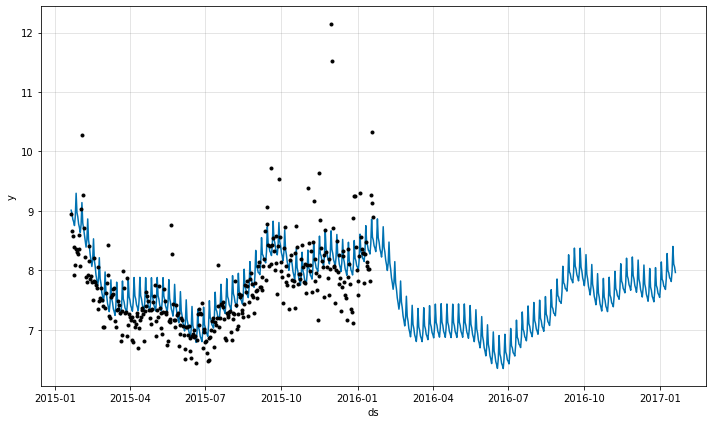

In [13]:
# get most recent forecast
forecast_last = m.get_last_forecasts(365, df, future_periods=365)
fig_fcst = m.plot(forecast_last)

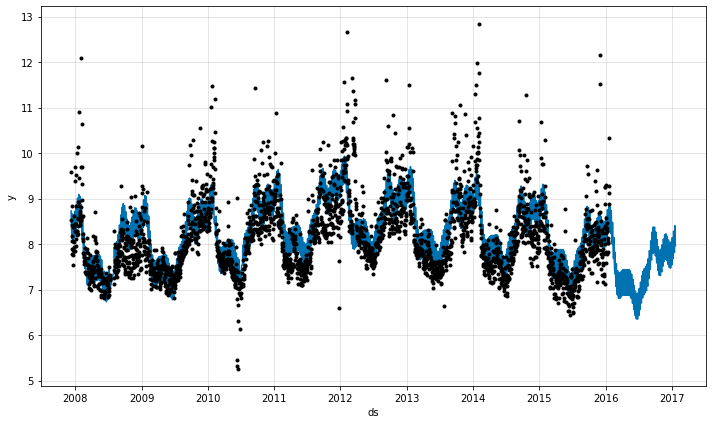

In [14]:
fig_fit = m.plot(forecast)

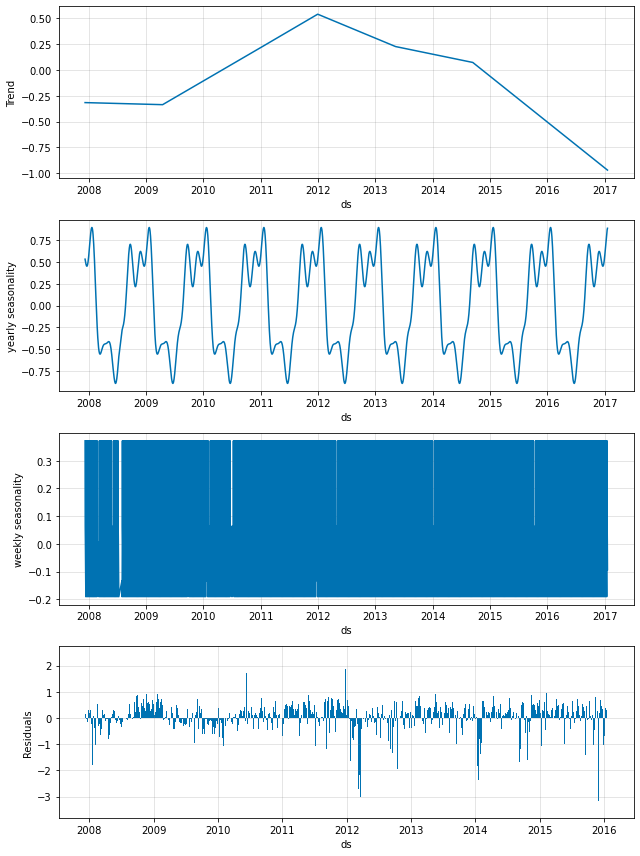

In [15]:
fig_comp = m.plot_components(forecast)

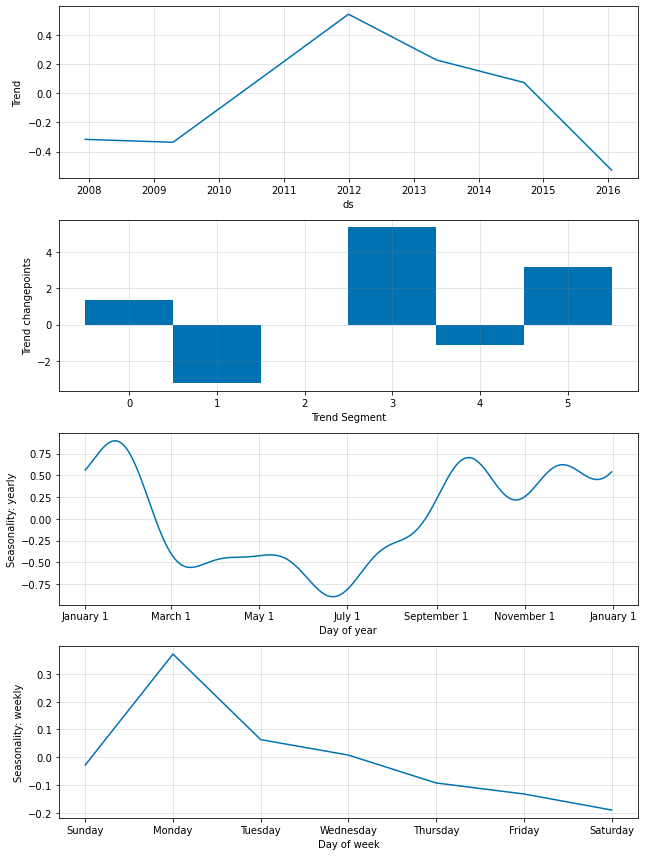

In [16]:
fig_comp = m.plot_parameters()

# Seasonality

In [17]:
m = NeuralProphet(
    yearly_seasonality=16,
    weekly_seasonality=8,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    seasonality_reg=10,
)

NOTICE: A Regularization strength for the seasonal Fourier Terms was set.Please note that this feature is experimental.


# Trend

In [18]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=10,
    trend_threshold=True,
)

NOTICE: A numeric value greater than 0 for continuous_trend is interpreted asthe trend changepoint regularization strength. Please note that this feature is experimental.


# Auto-Regression

In [19]:
m = NeuralProphet(
    n_forecasts=30,
    n_lags=60,
    ar_sparsity=0.01,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_changepoints=0,
)

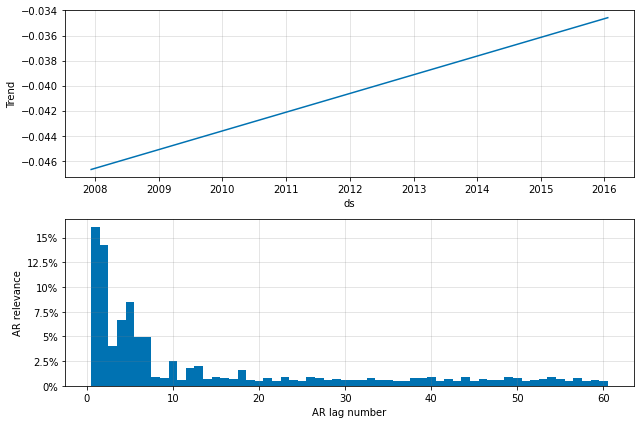

In [20]:
metrics = m.fit(df)
forecast = m.predict(n_history=60)
fig_comp = m.plot_parameters()

# Hidden Layers

In [ ]:
m = NeuralProphet(
    n_forecasts=30,
    n_lags=60,
    learning_rate=1.0,
    loss_func='Huber',
    normalize_y=True,
    num_hidden_layers=2,
    d_hidden=64,
)